In [769]:
#!pip install ggplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import scipy, scipy.stats
from sklearn import svm
from ggplot import *

In [770]:
#Cleansed and Combined Dataset for Kansas City crime prediction
url='C:/Users/deepa/Downloads/Crime_Data/kcpd_agged_final.csv'

In [771]:
dataset=pd.read_csv(url)

In [772]:
dataset.head()

,Unnamed: 0,from_date,zip_code,offense_society,offense_person,offense_property,offense_other,dv,firearm,offense_total,year,month,quarter,zip,city,population,unemployment_rate,house_price_index,per_cap_income,new_priv_housing
0,0,2010-01-01,64055,0,0,1,0,0,0,1,2010,1,1,64055,Independence,116792,8.8,165.14,40874,127.0
1,1,2010-01-01,64101,0,0,4,0,0,0,4,2010,1,1,64101,Kansas City,459946,8.8,165.14,40874,127.0
2,2,2010-01-01,64102,0,0,1,0,0,0,1,2010,1,1,64102,Kansas City,459946,8.8,165.14,40874,127.0
3,3,2010-01-01,64105,10,26,81,4,2,3,121,2010,1,1,64105,Kansas City,459946,8.8,165.14,40874,127.0
4,4,2010-01-01,64106,35,73,119,6,8,13,233,2010,1,1,64106,Kansas City,459946,8.8,165.14,40874,127.0


In [773]:
dataset.describe()

,Unnamed: 0,zip_code,offense_society,offense_person,offense_property,offense_other,dv,firearm,offense_total,year,month,quarter,zip,population,unemployment_rate,house_price_index,per_cap_income,new_priv_housing
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.00000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,2181.000000,64126.056842,19.729315,11.988998,56.667889,6.619299,8.123539,6.68760,95.005501,2012.977309,6.463213,2.486592,64126.056842,434716.653908,6.288471,166.851267,45393.898464,529.851020
std,1259.633942,35.978386,27.131185,17.287330,57.913586,11.753804,11.700433,10.24081,106.092962,2.000272,3.437890,1.115721,35.978386,116319.675706,1.488178,8.993652,2611.733168,311.110279
min,0.000000,64011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2010.000000,1.000000,1.000000,64011.000000,83.000000,4.100000,156.540000,40874.000000,117.000000
25%,1090.500000,64113.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.00000,10.000000,2011.000000,3.000000,1.000000,64113.000000,462219.000000,5.200000,159.460000,42814.000000,258.000000
50%,2181.000000,64128.000000,9.000000,5.000000,40.000000,1.000000,4.000000,2.00000,58.000000,2013.000000,6.000000,2.000000,64128.000000,467372.000000,6.300000,165.090000,45474.000000,459.000000
75%,3271.500000,64146.000000,28.000000,17.000000,89.000000,8.000000,12.000000,9.00000,150.000000,2015.000000,9.000000,3.000000,64146.000000,475310.000000,7.600000,169.090000,48394.000000,708.000000
max,4362.000000,64723.000000,204.000000,160.000000,340.000000,97.000000,98.000000,79.00000,637.000000,2016.000000,12.000000,4.000000,64723.000000,482118.000000,8.900000,189.140000,48514.000000,1621.000000


In [774]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 20 columns):
Unnamed: 0           4363 non-null int64
from_date            4363 non-null object
zip_code             4363 non-null int64
offense_society      4363 non-null int64
offense_person       4363 non-null int64
offense_property     4363 non-null int64
offense_other        4363 non-null int64
dv                   4363 non-null int64
firearm              4363 non-null int64
offense_total        4363 non-null int64
year                 4363 non-null int64
month                4363 non-null int64
quarter              4363 non-null int64
zip                  4363 non-null int64
city                 4363 non-null object
population           4363 non-null int64
unemployment_rate    4363 non-null float64
house_price_index    4363 non-null float64
per_cap_income       4363 non-null int64
new_priv_housing     4363 non-null float64
dtypes: float64(3), int64(15), object(2)
memory usage: 681.8+ KB


In [775]:
#Correlation among all the features
print(dataset.corr())

                   Unnamed: 0  zip_code  offense_society  offense_person  \
Unnamed: 0           1.000000  0.029485         0.050931       -0.006088   
zip_code             0.029485  1.000000        -0.013464       -0.085601   
offense_society      0.050931 -0.013464         1.000000        0.732168   
offense_person      -0.006088 -0.085601         0.732168        1.000000   
offense_property    -0.043287 -0.016849         0.854455        0.738977   
offense_other        0.036304 -0.016868         0.909733        0.618959   
dv                   0.081884  0.019898         0.942327        0.621491   
firearm              0.039547 -0.050742         0.840795        0.781840   
offense_total       -0.007575 -0.028458         0.942247        0.822146   
year                 0.989721  0.021559         0.049468       -0.006398   
month                0.105780  0.012872         0.021590        0.014385   
quarter              0.104709  0.014257         0.024104        0.017263   
zip         

In [776]:
#Import train_test_split & LinearRegression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [777]:
dataset.columns

Index(['Unnamed: 0', 'from_date', 'zip_code', 'offense_society',
       'offense_person', 'offense_property', 'offense_other', 'dv', 'firearm',
       'offense_total', 'year', 'month', 'quarter', 'zip', 'city',
       'population', 'unemployment_rate', 'house_price_index',
       'per_cap_income', 'new_priv_housing'],
      dtype='object')

In [778]:
#Drop few features from input dataset
# dv and firearm coming out to be important features. Keeping these two gives the R2 score as 0.83.
#Based on the OLS result set we can reject the #unemployment_rate and #new_priv_housing

dataset.drop(['offense_person', 'offense_property', 'offense_other','offense_society'], axis=1, inplace=True)
#dataset.drop(['offense_property', 'offense_other','offense_society'], axis=1, inplace=True)
dataset.drop(['zip', 'city'], axis=1, inplace=True)
#dataset.drop(['dv'], axis=1, inplace=True)
#dataset.drop(['firearm'], axis=1, inplace=True)
dataset.drop(['from_date'], axis=1, inplace=True)   
dataset.drop(['Unnamed: 0'], axis=1, inplace=True) 
dataset.drop(['unemployment_rate'], axis=1, inplace=True)
dataset.drop(['new_priv_housing'], axis=1, inplace=True)
#dataset.drop(['per_cap_income'], axis=1, inplace=True)
#dataset.drop(['house_price_index'], axis=1, inplace=True)

#dataset.drop(['quarter'], axis=1, inplace=True) 
#dataset.drop(['month','population'], axis=1, inplace=True)
#dataset.drop(['zip', 'city','from_date','Unnamed: 0','offense_person', 'offense_property', 'offense_other','offense_society'
             # ,'new_priv_housing','per_cap_income','population'], axis=1, inplace=True)

In [779]:
dataset.head(5)

,zip_code,dv,firearm,offense_total,year,month,quarter,population,house_price_index,per_cap_income
0,64055,0,0,1,2010,1,1,116792,165.14,40874
1,64101,0,0,4,2010,1,1,459946,165.14,40874
2,64102,0,0,1,2010,1,1,459946,165.14,40874
3,64105,2,3,121,2010,1,1,459946,165.14,40874
4,64106,8,13,233,2010,1,1,459946,165.14,40874


In [780]:
#Considering offense_total as the the response/dependent variable . Offense_total is summation of all 'offense_person',
#'offense_property', 'offense_society','offense_other'.
X=dataset
y=X.pop('offense_total')
#y=pd.DataFrame({'offense_total':y.values})

In [781]:
#Train test split
lr_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [831]:
model=lr_model.fit(X_train, y_train)
lr_model.coef_ ,
lr_model.intercept_

26826.93663863751

In [856]:
#Displaying Coefficients for each input variable
coeff_df= pd.DataFrame(lr_model.coef_,X.columns, columns=['Coefficient'])  
coeff_df


Index(['zip_code', 'dv', 'firearm', 'year', 'month', 'quarter', 'population',
       'house_price_index', 'per_cap_income'],
      dtype='object')

In [784]:
#Actual VS Predicted
y_pred = lr_model.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
1503,91,102.845195
1569,4,30.934886
3883,6,23.207070
3931,258,276.567531
3223,61,28.284947


In [785]:
#Metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))  )
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, y_pred)**(0.05))  )

Mean Absolute Error: 29.26879659227084
Mean Squared Error: 1654.331863435672
Root Mean Squared Error: 40.67347862472144
Root Mean Squared Error: 1.4485421326875563


In [835]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_pred))


R^2:  0.8436572705952416


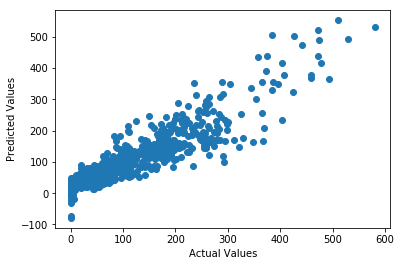

The more linear the graph the better we did at predicting y


In [787]:
#Actual VS Predicted
plt.scatter( y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("The more linear the graph the better we did at predicting y")

In [836]:
#CROSS VALIDATION
#y_CV=pd.DataFrame({'offense_total':y.values})
#X=dataset.drop('offense_total',axis=1)
X_CV = (X.iloc[:,0:].values).astype('float32')
y_CV=np.array(y)

In [843]:
print(len(y_CV))
type(y_CV)

4363


numpy.ndarray

In [840]:
from sklearn.model_selection import KFold # import KFold
X_CV=X_CV
y_CV = y_CV 
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X_CV,y_CV) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)
print(len(X_CV))
print(len(y_CV))

KFold(n_splits=2, random_state=None, shuffle=False)
4363
4363


In [841]:
X_CV

array([[6.40550e+04, 0.00000e+00, 0.00000e+00, ..., 1.16792e+05,
        1.65140e+02, 4.08740e+04],
       [6.41010e+04, 0.00000e+00, 0.00000e+00, ..., 4.59946e+05,
        1.65140e+02, 4.08740e+04],
       [6.41020e+04, 0.00000e+00, 0.00000e+00, ..., 4.59946e+05,
        1.65140e+02, 4.08740e+04],
       ...,
       [6.41610e+04, 0.00000e+00, 0.00000e+00, ..., 4.82118e+05,
        1.89140e+02, 4.85140e+04],
       [6.40530e+04, 0.00000e+00, 0.00000e+00, ..., 1.17365e+05,
        1.89140e+02, 4.85140e+04],
       [6.40150e+04, 0.00000e+00, 0.00000e+00, ..., 5.44620e+04,
        1.89140e+02, 4.85140e+04]], dtype=float32)

In [823]:
for train_index, test_index in kf.split(X_CV,y_CV):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_CV_train, X_CV_test = X_CV[train_index], X_CV[test_index]
 y_CV_train, y_CV_test = y_CV[train_index], y_CV[test_index]


TRAIN: [ 873  874  875 ... 4360 4361 4362] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [844]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [845]:
model=lr_model.fit(X_CV_train, y_CV_train)
lr_model.coef_
lr_model.intercept_
y_pred_CV = model.predict(X_CV_test) 

In [846]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_CV_test, y_pred_CV))

R^2:  0.8405654032618499


In [847]:
#Perform 10-fold cross validation
#scores = cross_val_score(model, X_CV, y_CV, cv=10)
#print ("Cross-validated scores:", scores)
scores = cross_val_score(model, X_CV, y_CV, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.84539094 0.85791889 0.82971175 0.85186129 0.82906475 0.86639124
 0.79537326 0.83820346 0.83604562 0.86324686]


In [848]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.04)


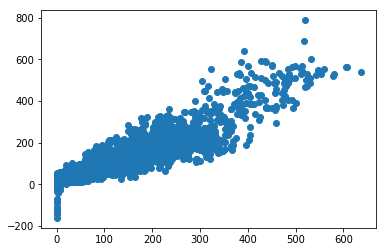

In [849]:
predictions = cross_val_predict(model, X_CV, y_CV, cv=10)
plt.scatter(y_CV, predictions)

In [850]:
accuracy = metrics.r2_score(y_CV, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.8422274293364539


In [851]:
#LASSO ALGO
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#y_pred_lasso = lasso.fit(X_CV_train, y_CV_train).predict(X_CV_test)
#r2_score_lasso = r2_score(y_CV_test, y_pred_lasso)

print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.843418


In [805]:
####Visualize the test model
#plt.scatter(X_test['unemployment_rate'], y_test, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
#plt.scatter(X_test['unemployment_rate'], lr_model.predict(X_test), color='blue')
#plt.xlabel('unemployment_rate')
#plt.ylabel('offense_total')
#plt.show()

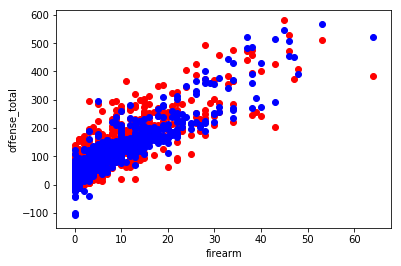

In [853]:
#Visualize the test model
plt.scatter(X_test['firearm'], y_test, color = 'red')
#plt.plot(X_test, lr_model.predict(X_test), color='blue')
plt.scatter(X_test['firearm'], lr_model.predict(X_test), color='blue')
plt.xlabel('firearm')
plt.ylabel('offense_total')
plt.show()

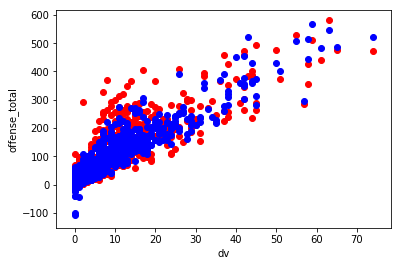

In [854]:
#Visualize the test model
plt.scatter(X_test['dv'], y_test, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['dv'], lr_model.predict(X_test), color='blue')
plt.xlabel('dv')
plt.ylabel('offense_total')
plt.show()

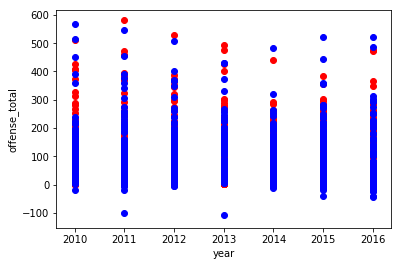

In [855]:
#Visualize the test model
plt.scatter(X_test['year'], y_test, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['year'], lr_model.predict(X_test), color='blue')
plt.xlabel('year')
plt.ylabel('offense_total')
plt.show()

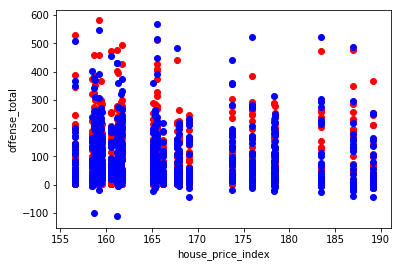

In [809]:
#Visualize the test model
plt.scatter(X_test['house_price_index'], y_test, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['house_price_index'], lr_model.predict(X_test), color='blue')
plt.xlabel('house_price_index')
plt.ylabel('offense_total')
plt.show()

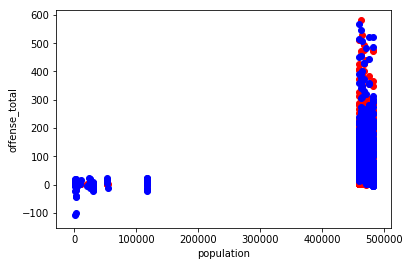

In [810]:
#Visualize the test model
plt.scatter(X_test['population'], y_test, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['population'], lr_model.predict(X_test), color='blue')
plt.xlabel('population')
plt.ylabel('offense_total')
plt.show()

In [811]:
#Summary of the features along with important metrices.
#A predictor that has a low p-value is likely to be a meaningful addition to the model because 
#changes in the predictor's value are related to changes in the response variable.
#Based on the result set we can reject the #unemployment_rate and #new_priv_housing
result = sm.OLS( y,X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          offense_total   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5205.
Date:                Thu, 19 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:41:54   Log-Likelihood:                -22449.
No. Observations:                4363   AIC:                         4.492e+04
Df Residuals:                    4354   BIC:                         4.497e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
zip_code             -0.1729      0.020     -8.791      0.000      -0.212      -0.134
dv                    4.6734      0.087     53.670      0.000       4.503       4.844
firearm               4.4785      0.100     44.781      0.000       4.282       4.675
year                  5.6814      0.638      8.904      0.000       4.430       6.932
month                -1.0252      0.769     -1.333      0.183      -2.533       0.483
quarter               7.5939      2.374      3.199      0.001       2.939      12.248
population         9.373e-05   6.33e-06     14.812      0.000    8.13e-05       0.000
house_price_index    -0.7155      0.097     -7.378      0.000      -0.906      -0.525
per_cap_income       -0.0056      0.001    -10.846      0.000      -0.007      -0.005
==============================================================================
Omnibus:                      806.235   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3197.380
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       6.817   Cond. No.                     1.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [812]:
#dataset['year'] = X_test.iloc[:,3]
#dataset['Offence_Occurence'] = y_test


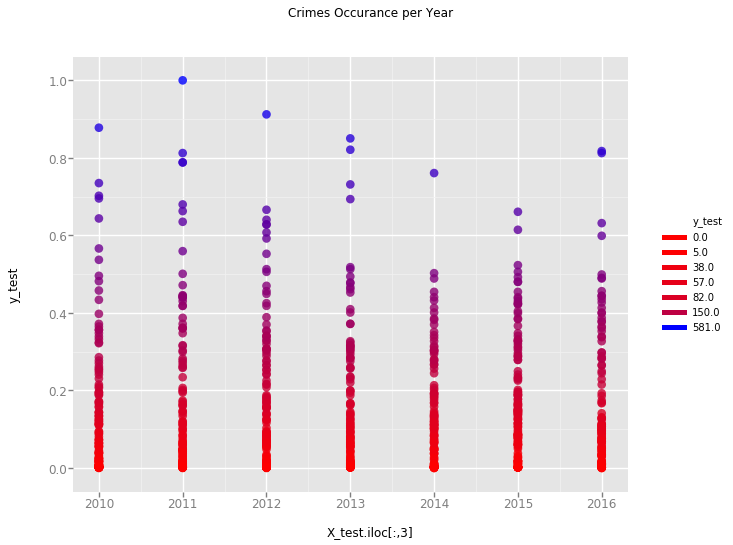

<ggplot: (-9223371883263927478)>

In [813]:
chart = ggplot( X, aes(x='X_test.iloc[:,3]', y='y_test', color='y_test') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance per Year")
chart

In [814]:
#dataset['ZipCode'] = X_test.iloc[:,0]
#dataset['Offence_Occurence'] = y_test


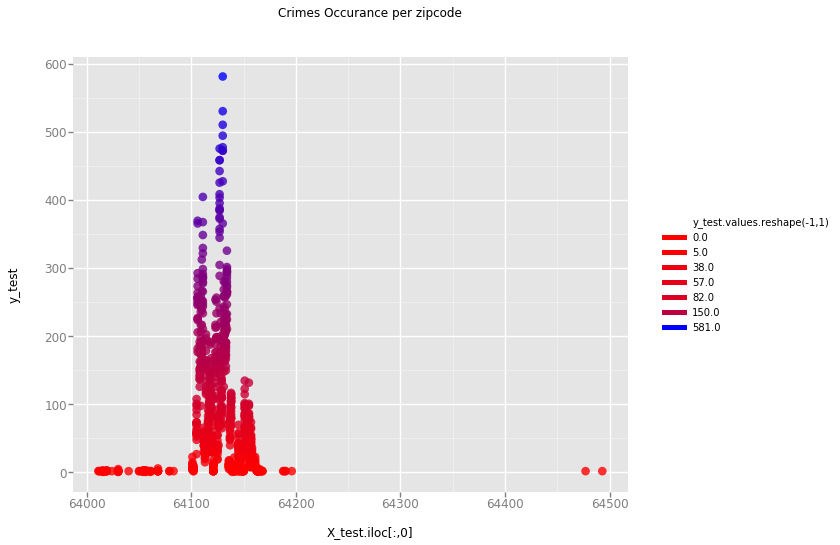

<ggplot: (153588558947)>

In [622]:
chart = ggplot( dataset, aes(x='X_test.iloc[:,0]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance per zipcode")
chart


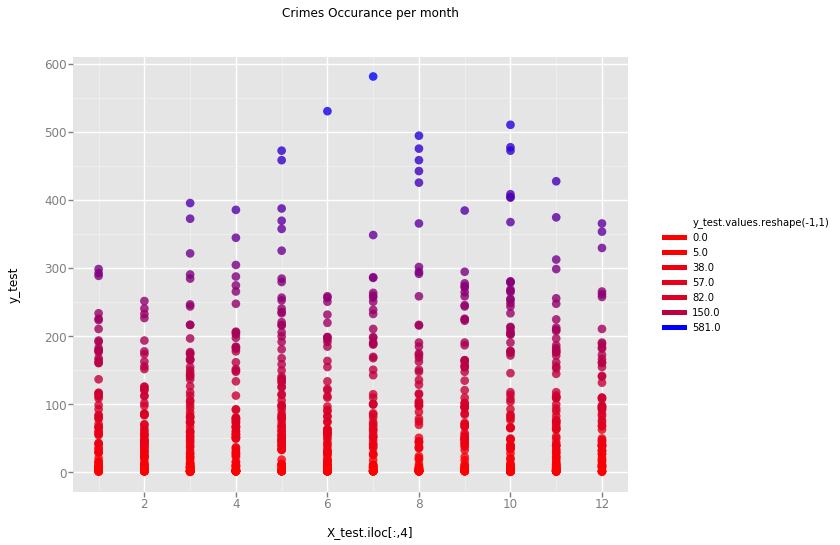

<ggplot: (153583432298)>

In [623]:
#dataset['month'] = X_test.iloc[:,4]
#dataset['Offence_Occurence'] = y_test
chart = ggplot( dataset, aes(x='X_test.iloc[:,4]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance per month")
chart



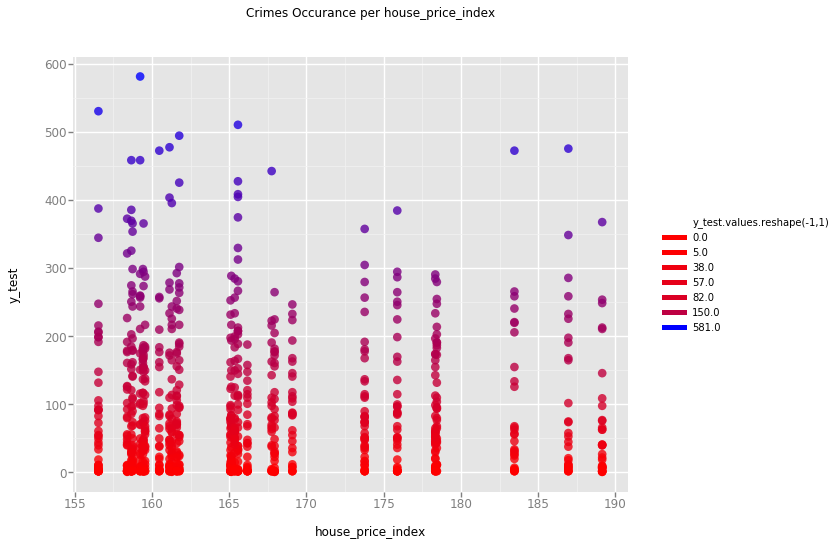

<ggplot: (153588827305)>

In [624]:
#dataset['house_price_index'] = X_test.iloc[:,8]
#dataset['Offence_Occurence'] = y_test
chart = ggplot( dataset, aes(x='house_price_index', y='y_test', color='y_test.values.reshape(-1,1)') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance per house_price_index")
chart

In [625]:
#dataset['new_priv_housing'] = X_test.iloc[:,9]
#dataset['Offence_Occurence'] = y_test
#chart = ggplot( dataset, aes(x='X_test.iloc[:,9]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
    #    + geom_point(size=75,alpha=0.8) \
   #     + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance per new_priv_housing")
#chart

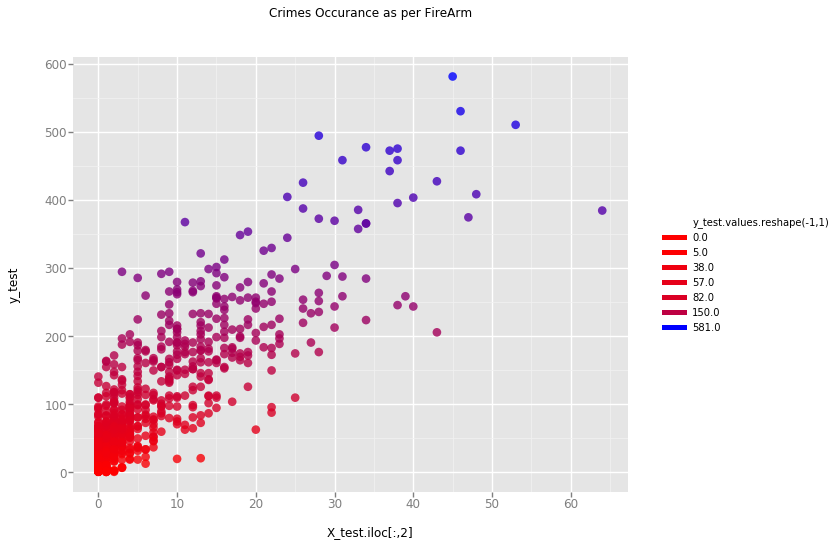

<ggplot: (153588507512)>

In [626]:

#dataset['firearm'] = X_test.iloc[:,2]
#dataset['Offense_Total'] = y_test
chart = ggplot( dataset, aes(x='X_test.iloc[:,2]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance as per FireArm")
chart

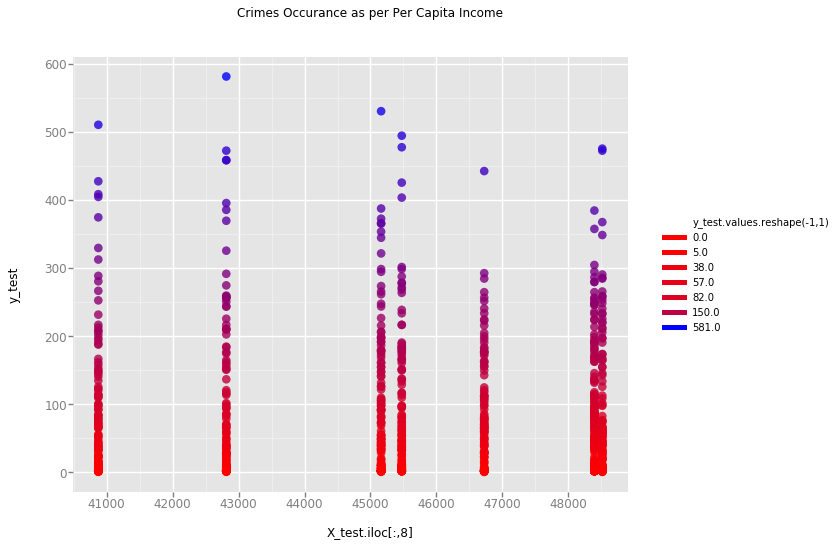

<ggplot: (153587314468)>

In [627]:
#dataset['per_cap_income'] = X_test.iloc[:,8]
#dataset['Offense_Total'] = y_test
chart = ggplot( dataset, aes(x='X_test.iloc[:,8]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("Crimes Occurance as per Per Capita Income")
chart




In [829]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit (X_CV, y_CV) 


reg.coef_

reg.intercept_ 


C:\Users\deepa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.720279292962481e-12 / 5.960464477539063e-08
  RuntimeWarning)


26828.732

In [477]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X_train, y_train)       


reg.alpha_  

10.0